In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [259]:
%matplotlib inline

In [260]:
df = pd.read_csv('HepatitisCdata.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [262]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [263]:
df_2 = df.copy()
df_corr = df.copy()

In [264]:
df['category'] = df['category'].map({'0=Blood Donor': 'blood donor', '0s=suspect Blood Donor': 'blood donor', '1=Hepatitis': 'Hepatitis', '2=Fibrosis': 'Fibrosis', '3=Cirrhosis':'Cirrhosis'})

In [265]:
df_2['category'] = df_2['category'].map({'0=Blood Donor': 'No liver disease', '0s=suspect Blood Donor': 'No liver disease', '1=Hepatitis': 'Liver disease', '2=Fibrosis': 'Liver disease', '3=Cirrhosis':'Liver disease'})

<Axes: xlabel='ast', ylabel='alt'>

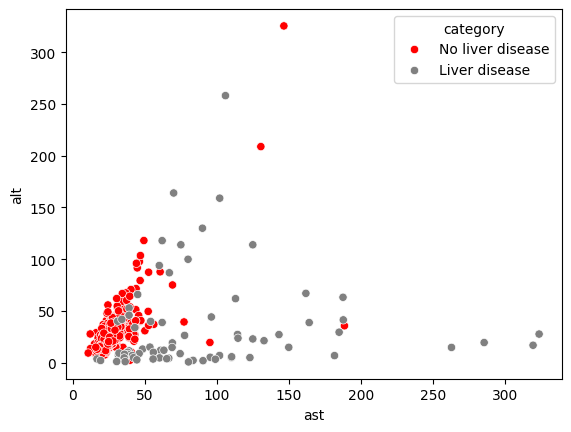

In [270]:
palette = {
    'Liver disease': 'gray',
    'No liver disease': 'red' }
sns.scatterplot(data=df_2, x='ast', y='alt', hue='category', palette=palette)

C:\Users\Fateme\AppData\Local\Temp\ipykernel_11036\937573276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='che', palette=palette)


<Axes: xlabel='category', ylabel='che'>

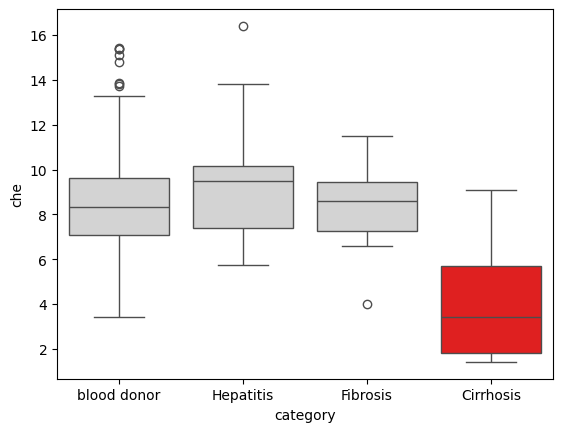

In [271]:
palette = {
    'blood donor': 'lightgray',
    'Hepatitis': 'lightgray',
    'Fibrosis': 'lightgray',
    'Cirrhosis': 'red' }
sns.boxplot(data=df, x='category', y='che', palette=palette)


<Axes: xlabel='category', ylabel='chol'>

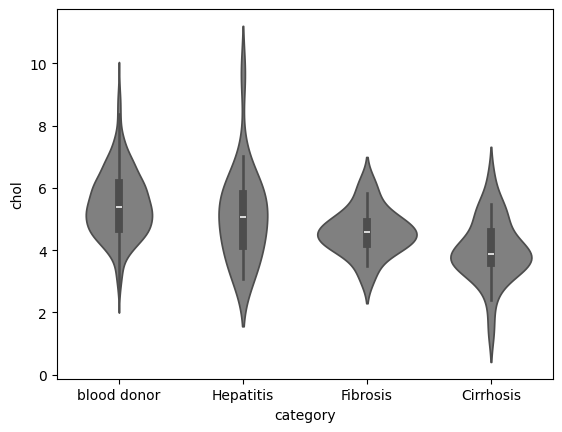

In [272]:
sns.violinplot(data=df, x='category', y='chol', color='gray')


<Axes: xlabel='category', ylabel='ggt'>

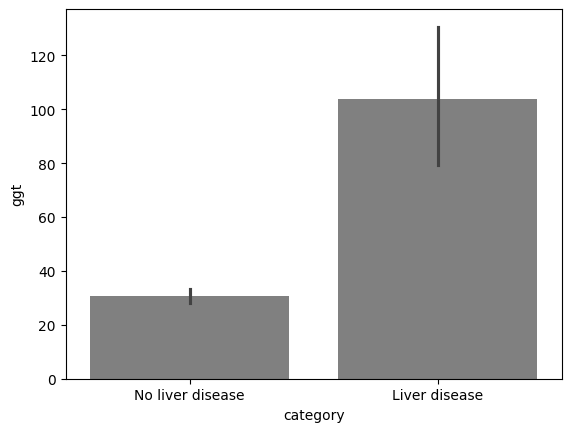

In [273]:
sns.barplot(data=df_2, x='category', y='ggt', color='gray')

In [274]:
df_corr['category'] = df_corr['category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 2, '3=Cirrhosis':3})
df_corr['sex'] = df_corr['sex'].map({'m': 1, 'f': 2})

<Axes: >

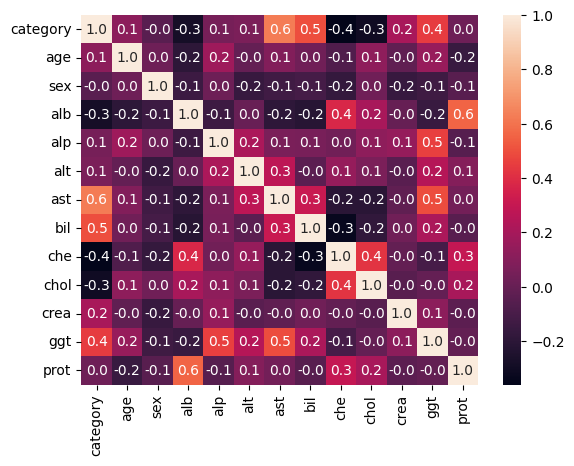

In [282]:
sns.color_palette("vlag", as_cmap=True)
sns.heatmap(data=df_corr.corr(numeric_only=True),
            annot=True, 
            fmt='.1f')